In [33]:
import random
import csv
from datetime import datetime, timedelta

products = [
    "turmeric powder", "sugar", "jaggery", "rice", "millets", "oats", "wheat flour", "maida", "ragi flour", 
    "idiyappam flour", "rice flour", "rava", "tamarind", "red chilli", "toor dal", "moong daal", "chana daal", 
    "rajma", "crystal salt", "powder salt", "red chilli powder", "dhania powder", "pepper powder", 
    "cumin powder", "garam masala powder", "chat masala powder", "biryani masala powder", "sambar powder",
    "rasam powder", "idli powder", "coffee powder", "tea powder", "cooking oil", "coconut oil", 
    "gingely oil", "ghee", "butter", "deepam oil"
]
product_prices = {
    "turmeric powder": 160,
    "sugar": 45,
    "jaggery": 55,
    "rice": 60,
    "millets": 70,
    "oats": 80,
    "wheat flour": 35,
    "maida": 40,
    "ragi flour": 50,
    "idiyappam flour": 60,
    "rice flour": 50,
    "rava": 38,
    "tamarind": 160,
    "red chilli": 200,
    "toor dal": 110,
    "moong daal": 120,
    "chana daal": 90,
    "rajma": 100,
    "crystal salt": 15,
    "powder salt": 18,
    "red chilli powder": 180,
    "dhania powder": 160,
    "pepper powder": 300,
    "cumin powder": 220,
    "garam masala powder": 90,
    "chat masala powder": 85,
    "biryani masala powder": 95,
    "sambar powder": 70,
    "rasam powder": 60,
    "idli powder": 50,
    "coffee powder": 400,
    "tea powder": 260,
    "cooking oil": 130,
    "coconut oil": 180,
    "gingely oil": 220,
    "ghee": 550,
    "butter": 480,
    "deepam oil": 100
}
days = 365  
start_date = datetime.now() - timedelta(days=days)
sales_data = []
for i in range(days):
    date = start_date + timedelta(days=i)
    for product in products:
        quantity_sold = random.randint(5, 50)
        base_price = product_prices[product]
        total_revenue = quantity_sold * base_price
        sales_data.append({
            "date": date.strftime("%Y-%m-%d"),
            "product": product,
            "quantity_sold": quantity_sold,
            "base_price": base_price,
            "total_revenue": total_revenue
        })

# Save to CSV
with open("dummy_sales_data.csv", mode="w", newline="") as file:
    writer = csv.DictWriter(file, fieldnames=["date", "product", "quantity_sold", "base_price", "total_revenue"])
    writer.writeheader()
    writer.writerows(sales_data)

print("✅ Dummy sales data saved to 'dummy_sales_data.csv'")


✅ Dummy sales data saved to 'dummy_sales_data.csv'


In [43]:
import pandas as pd
df = pd.read_csv("dummy_sales_data.csv")
df.head()

date          product  quantity_sold  base_price  total_revenue
0  2024-07-22  turmeric powder             39         160           6240
1  2024-07-22            sugar             26          45           1170
2  2024-07-22          jaggery             46          55           2530
3  2024-07-22             rice             24          60           1440
4  2024-07-22          millets             17          70           1190

In [1]:
import os
print("CSV file saved at:", os.path.abspath("dummy_sales_data.csv"))

CSV file saved at: C:\Users\dprem\dummy_sales_data.csv


In [47]:
print(df.groupby("product")["total_revenue"].sum())

product
biryani masala powder     953800
butter                   4883040
chana daal                861660
chat masala powder        852635
coconut oil              1769400
coffee powder            3955600
cooking oil              1273740
crystal salt              151725
cumin powder             2232120
deepam oil               1006700
dhania powder            1527040
garam masala powder       905310
ghee                     5689200
gingely oil              2170300
idiyappam flour           602580
idli powder               513200
jaggery                   536635
maida                     394760
millets                   636020
moong daal               1235640
oats                      771840
pepper powder            2973600
powder salt               175464
ragi flour                507150
rajma                     974600
rasam powder              579360
rava                      383496
red chilli               2069600
red chilli powder        1935000
rice                      609900
ri

In [48]:
daily_revenue = df.groupby("date")["total_revenue"].sum()
print(daily_revenue)

date
2024-07-22    113981
2024-07-23    142367
2024-07-24    147286
2024-07-25    145180
2024-07-26    141056
               ...  
2025-07-17    109671
2025-07-18    149188
2025-07-19    122654
2025-07-20    146917
2025-07-21    170963
Name: total_revenue, Length: 365, dtype: int64


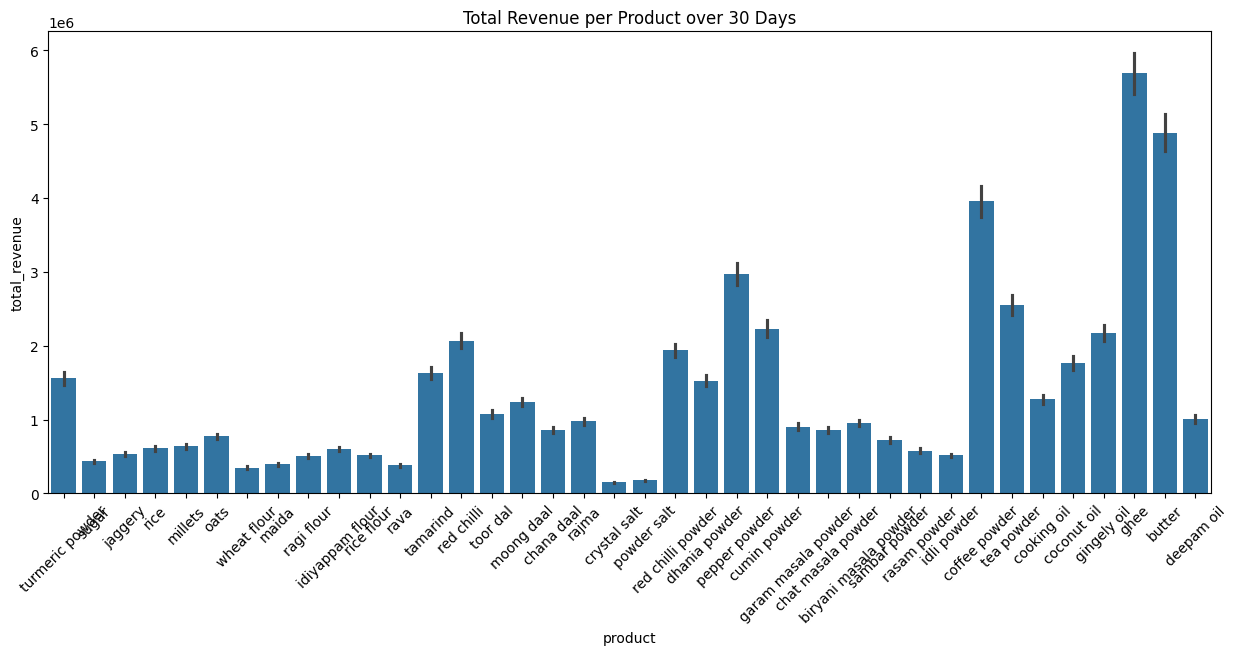

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,6))
sns.barplot(x="product", y="total_revenue", data=df, estimator=sum)
plt.xticks(rotation=45)
plt.title("Total Revenue per Product over 30 Days")
plt.show()

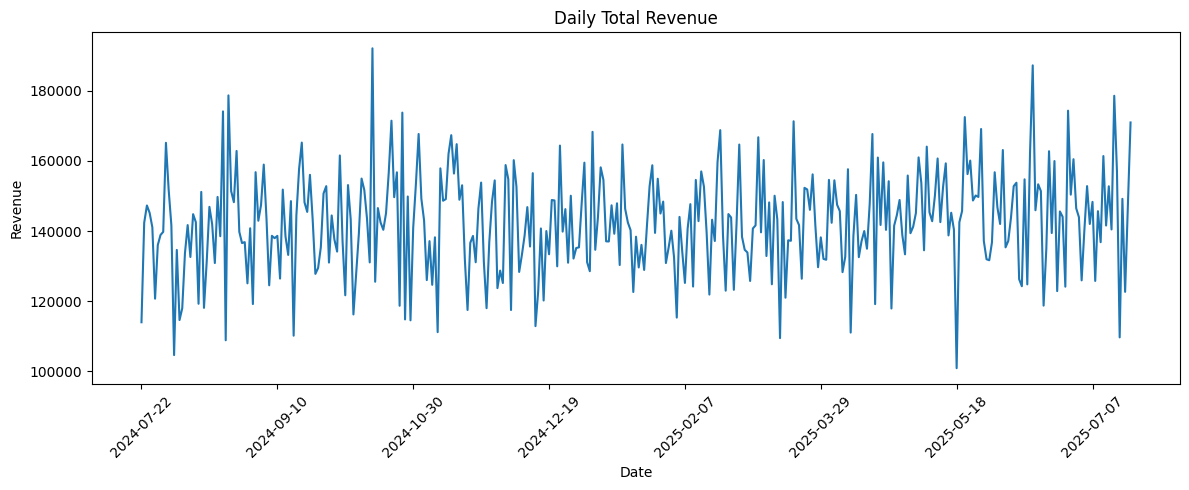

In [55]:
plt.figure(figsize=(12,5))
daily_revenue.plot()
plt.title("Daily Total Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [57]:
df['date'] = pd.to_datetime(df['date'])                # Ensure date is in datetime format
df['day_of_week'] = df['date'].dt.dayofweek            # Monday=0, Sunday=6
df['weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['month'] = df['date'].dt.month
df['avg_quantity_by_product'] = df.groupby('product')['quantity_sold'].transform('mean')
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['product_encoded'] = le.fit_transform(df['product'])
X = df[['product_encoded', 'quantity_sold', 'day_of_week', 'weekend', 'month', 'avg_quantity_by_product']]
y = df['total_revenue']



In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 129.84416827685658
R2 Score: 0.9999925050394511


In [62]:
future_sample = pd.DataFrame({
    "product_encoded": [le.transform(["sugar"])[0]],
    "quantity_sold": [35],
    "day_of_week": [2],  # Wednesday
    "weekend": [0],
    "month": [7],
    "avg_quantity_by_product": [df[df['product'] == "oil"]['quantity_sold'].mean()]
})

predicted_revenue = model.predict(future_sample)
print("Predicted Revenue:", predicted_revenue[0])


Predicted Revenue: 1622.05


In [63]:
import joblib

joblib.dump(model, "pricing_model.joblib")

['pricing_model.joblib']